In [4]:
#essential libraries
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [5]:
#loading Dataset
data = pd.read_excel('/content/ECG Datasets.xlsx', header=None).to_numpy()

In [6]:
#creating Time series
time_series_array = np.zeros((data.shape[0] - 4, 5))

# Populate the time series array
for i in range(time_series_array.shape[0]):
    time_series_array[i, 0] = data[i]
    time_series_array[i, 1] = data[i + 1]
    time_series_array[i, 2] = data[i + 2]
    time_series_array[i, 3] = data[i + 3]
    time_series_array[i, 4] = data[i + 4]
data = time_series_array

In [7]:
print(data)

[[ 0.665  0.71   0.745  0.76   0.785]
 [ 0.71   0.745  0.76   0.785  0.79 ]
 [ 0.745  0.76   0.785  0.79   0.815]
 ...
 [-0.025 -0.015 -0.025 -0.045 -0.03 ]
 [-0.015 -0.025 -0.045 -0.03  -0.045]
 [-0.025 -0.045 -0.03  -0.045 -0.05 ]]


In [8]:
#Define Activation functions

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [9]:
#normalizing Data
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)
data = (data - min_vals) / (max_vals - min_vals)

In [10]:
print(data)

[[0.92902542 0.93855932 0.94597458 0.94915254 0.95444915]
 [0.93855932 0.94597458 0.94915254 0.95444915 0.95550847]
 [0.94597458 0.94915254 0.95444915 0.95550847 0.96080508]
 ...
 [0.78283898 0.78495763 0.78283898 0.77860169 0.78177966]
 [0.78495763 0.78283898 0.77860169 0.78177966 0.77860169]
 [0.78283898 0.77860169 0.78177966 0.77860169 0.77754237]]


In [11]:
#splitting data into train and test
num_train = round(data.shape[0] * 0.7)
num_test = data.shape[0] - num_train
X_test = data[num_train:,:-1]
X_train = data[:num_train,:-1]
Y_train = data[:num_train,-1]
Y_test = data[num_train:,-1]

In [12]:
n0 = data.shape[1]-1
n1 = 10
n2 = 2
epoch = 40

learning_rate_c = 0.007
learning_rate_2 = 0.008
learning_rate_1 = 0.006

output_data_train = np.zeros((num_train,n2))
output_data_test = np.zeros((num_test,n2))
mse_train = np.zeros((epoch,n2))
mse_test = np.zeros((epoch,n2))
mse_train_2 = np.zeros((epoch,n2))
mse_test_2 = np.zeros((epoch,n2))
mse_error_train = np.zeros((num_train,n2))
mse_error_test = np.zeros((num_test,n2))

<Figure size 1200x500 with 0 Axes>

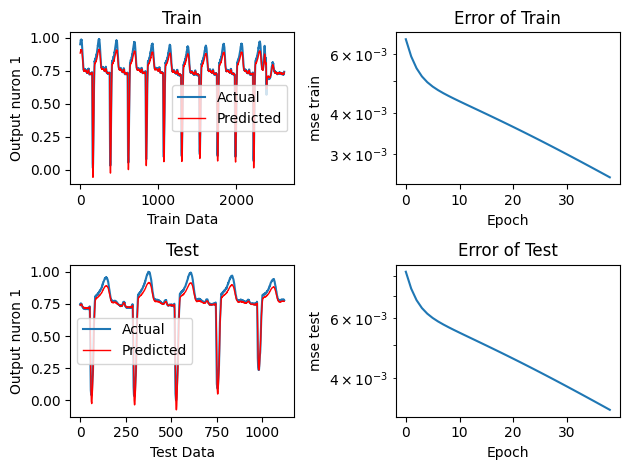

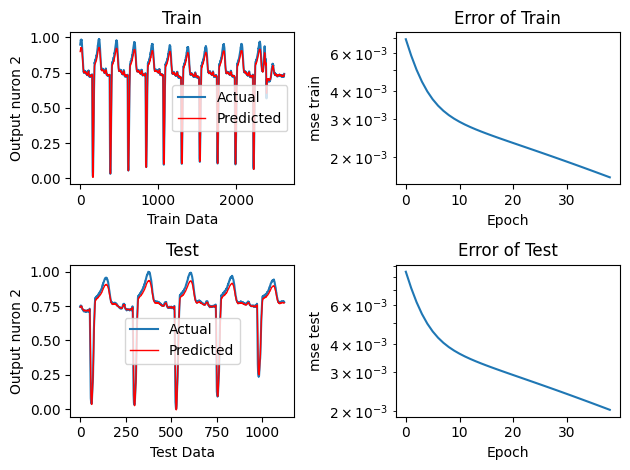

<Figure size 1200x500 with 0 Axes>

In [13]:
a, b = -1, 1
w1 = np.random.uniform(a, b, (n1, n0))
w_c = np.random.uniform(a, b, (n1, n1))
w2 = np.random.uniform(a, b, (n2, n1))
net1 = np.zeros(n1)
net2 = np.zeros(n2)
o1 = np.zeros(n1)
o2 = np.zeros(n2)
x_c = np.zeros(n1)
o1_K_1 = np.zeros(n1)
#FF
error = np.zeros(n2)
for t in range(epoch):
  num_row = 0
  for i in range(num_train):
      if num_row> 2:
        o1_K_1 = np.copy(x_c)
      x_c = np.copy(o1)

      input = X_train[i]
      net1 = w1.dot(input) + w_c.dot(x_c)
      o1 = sigmoid(net1)

      net2 = w2.dot(o1)
      o2 = net2

      target = Y_train[i]
      error = target - o2

      f_1 = sigmoid_derivative(net1)
      f_1_diag = np.diagflat(f_1)

      f_2 = [1, 1]
      f_2_diag = np.diagflat(f_2)


      #BP
      w2_k_1 = w2
      w2 += learning_rate_2 * error.reshape(-1,1).T.dot(f_2_diag).T.dot(o1.reshape(-1,1).T)
      w1 += learning_rate_1 * error.reshape(-1,1).T.dot(f_2_diag).dot(w2_k_1).dot(f_1_diag).T.dot(input.reshape(-1,1).T)
      w_c += learning_rate_c *  error.reshape(-1,1).T.dot(f_2_diag).dot(w2_k_1).dot(f_1_diag).T.dot(x_c.reshape(-1,1).T + w_c.dot(o1_K_1).reshape(-1,1).T)
      num_row +=1

  for i in range(num_train):
      # Forward pass
      input = X_train[i]
      net1 = w1.dot(input) + w_c.dot(x_c)
      o1 = sigmoid(net1)

      net2 = w2.dot(o1)
      o2 = net2

      mse_error_train[i] = Y_train[i] - o2
      output_data_train[i] = o2

  for i in range(num_test):
      # Forward pass
      input = X_test[i]
      net1 = w1.dot(input) + w_c.dot(x_c)
      o1 = sigmoid(net1)

      net2 = w2.dot(o1)
      o2 = net2

      mse_error_test[i] = Y_test[i] - o2
      output_data_test[i] = o2

  mse_train[t] = np.mean(mse_error_train[:,0]**2)
  mse_test[t] = np.mean(mse_error_test[:,0]**2)
  mse_train_2[t] = np.mean(mse_error_train[:,1]**2)
  mse_test_2[t] = np.mean(mse_error_test[:,1]**2)

  def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

  fig=plt.figure(2)
  plt.subplot(2, 2, 1)
  plt.cla()
  plt.plot(data[:num_train, 3], label="Actual")
  plt.plot(output_data_train[:,0], 'r', linewidth=1, label="Predicted")
  plt.legend()
  plt.title('Train')
  plt.xlabel('Train Data')
  plt.ylabel('Output nuron 1')

  #MSE train
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t,0])
  plt.title('Error of Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

  #MSE test
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:, 3], label="Actual")
  plt.plot(output_data_test[:,0], 'r', linewidth=1, label="Predicted")
  plt.legend()
  plt.title('Test')
  plt.xlabel('Test Data')
  plt.ylabel('Output nuron 1')

  # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t,0])
  plt.title('Error of Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')
  fig.tight_layout()
  display(plt.gcf())

  fig=plt.figure(3)
  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 3], label="Actual")
  plt.plot(output_data_train[:,1], 'r', linewidth=1, label="Predicted")
  plt.legend()
  plt.title('Train')
  plt.xlabel('Train Data')
  plt.ylabel('Output nuron 2')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train_2[:t,0])
  plt.title('Error of Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

  # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:, 3], label="Actual")
  plt.plot(output_data_test[:,1], 'r', linewidth=1, label="Predicted")
  plt.legend()
  plt.title('Test')
  plt.xlabel('Test Data')
  plt.ylabel('Output nuron 2')

  # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test_2[:t,0])
  plt.title('Error of Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  fig.tight_layout()
  display(plt.gcf())
  clear_output(wait=True)

plt.figure(4, figsize=(12, 5))



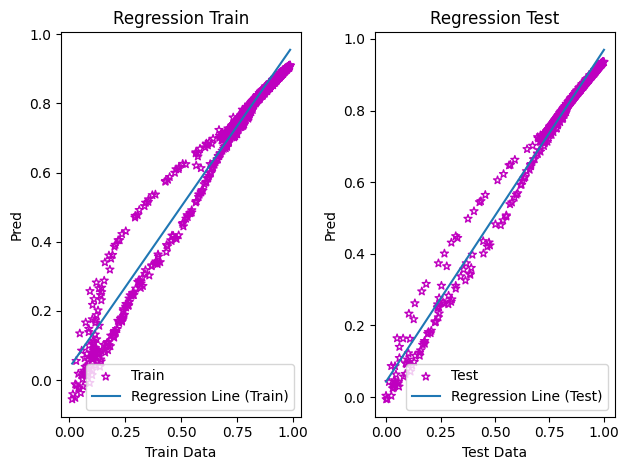

In [15]:
# Regression Train Plot
plt.subplot(1, 2, 1)
plt.scatter(data[:num_train, 3], output_data_train[:, 0], label='Train', marker='*', edgecolors='m', facecolors='none')
plot_regression_line(data[:num_train, 3], output_data_train[:, 0], 'Regression Line (Train)')
# plt.plot([min(data[:, 3]), max(data[:, 3])], [min(data[:, 3]), max(data[:, 3])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Train Data')
plt.ylabel('Pred')
plt.title('Regression Train')
plt.legend()

# Regression Test Plot
plt.subplot(1, 2, 2)
plt.scatter(data[num_train:num_train + num_test, 3], output_data_test[:num_test, 1], label='Test', marker='*', edgecolors='m', facecolors='none')
plot_regression_line(data[num_train:data.shape[0], 3], output_data_test[:num_test, 1], 'Regression Line (Test)')
# plt.plot([min(data[:, 3]), max(data[:, 3])], [min(data[:, 3]), max(data[:, 3])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Test Data')
plt.ylabel('Pred')
plt.title('Regression Test')
plt.legend()

plt.tight_layout()
plt.show()